# Spherical Voronoi Diagrams

## Plot a sphere

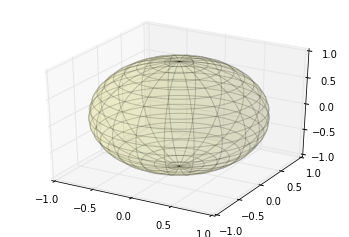

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))    

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='y', alpha=0.1)

## Plot the generator points

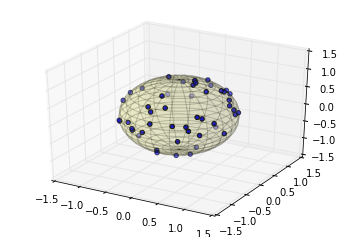

In [2]:
# define a set of points on the sphere in any way you like
import helpers  # this just randomly generates some points
points = helpers.generate_random_array_spherical_generators(50,1, np.random.RandomState(117))

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='y', alpha=0.1)
ax.scatter(points[:,0], points[:,1], points[:,2])

## Plot the vertices

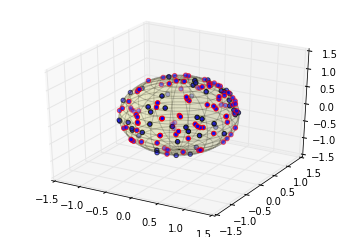

In [3]:
from _spherical_voronoi import SphericalVoronoi   # this will be in scipy.spatial from 0.18. release
radius = 1
center = np.array([0,0,0])
sv = SphericalVoronoi(points, radius, center)

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='y', alpha=0.1)
ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(sv.vertices[:,0], sv.vertices[:,1], sv.vertices[:,2], color='r')

## Plot the regions

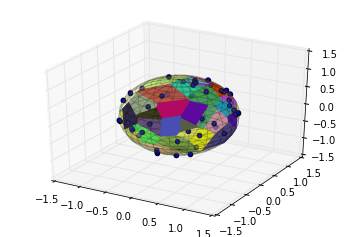

In [4]:
import scipy
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='y', alpha=0.1)
ax.scatter(points[:,0], points[:,1], points[:,2])

sv.sort_vertices_of_regions()
# this is not yet completely accurate
for n in range(0, len(sv.regions)):
    region = sv.regions[n]
    ax.scatter(points[n, 0], points[n, 1], points[n, 2], c='b')
    random_color = colors.rgb2hex(scipy.rand(3))
    polygon = Poly3DCollection([sv.vertices[region]], alpha=1.0)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)